In [317]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import urllib
import time
import json
from pprint import pprint
import datetime
import scipy.stats as st
from scipy.stats import linregress
import base64
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
from api_keys import Client_ID_key
from api_keys import Client_Secret_key



In [318]:
csv_path = "Resources/top10s.csv"

In [319]:
client_id = Client_ID_key
client_secret = Client_Secret_key

In [320]:
class SpotifyAPI(object):
    access_token = None 
    access_token_expires = datetime.datetime.now()
    access_token_did_expire = True
    client_id = None 
    client_secret = None 
    token_url = "https://accounts.spotify.com/api/token"
    
    def __init__(self, client_id, client_secret, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.client_id = client_id
        self.client_secret = client_secret
    
    def get_client_credentials(self):
        """
        Returns a base 64 encoded string
        """
        client_id = self.client_id
        client_secret = self.client_secret
        
        if client_secret == None or client_id == None:
            raise Exception("You must set client_id and client_secret")
        
        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()
        
    def get_token_headers(self):
        client_creds_b64 = self.get_client_credentials()
        return {
            "Authorization" : f"Basic {client_creds_b64}"
        }
    
    def get_token_data(self):
        return {
            "grant_type" : "client_credentials"
        }
    
    def perform_auth(self):
        token_url = self.token_url
        token_data = self.get_token_data()
        token_headers = self.get_token_headers()
        r = requests.post(token_url, data = token_data, headers = token_headers)
        if r.status_code not in range(200, 299): 
            return False
        data = r.json()
        now = datetime.datetime.now()
        access_token = data['access_token']
        expires_in = data['expires_in'] # seconds 
        expires = now + datetime.timedelta(seconds = expires_in)
        self.access_token = access_token
        self.access_token_expires = expires
        self.access_token_did_expire = expires < now
        return True


In [321]:
spotify = SpotifyAPI(client_id, client_secret)

In [322]:
spotify.perform_auth()

False

In [323]:
access_token = spotify.access_token

In [324]:
decade_df = pd.read_csv(csv_path, encoding = 'cp1252')

In [325]:
del decade_df ["Unnamed: 0"]
decade_df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


<ipython-input-326-37304a4101cc>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs= decade_df[decade_df['year'] ==y] [decade_df['top genre'] ==i]
<ipython-input-326-37304a4101cc>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs= decade_df[decade_df['year'] ==y] [decade_df['top genre'] ==i]
<ipython-input-326-37304a4101cc>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs= decade_df[decade_df['year'] ==y] [decade_df['top genre'] ==i]
<ipython-input-326-37304a4101cc>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs= decade_df[decade_df['year'] ==y] [decade_df['top genre'] ==i]
<ipython-input-326-37304a4101cc>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs= decade_df[decade_df['year'] ==y] [decade_df['top genre'] ==i]
<ipython-input-326-37304a4101cc>:15: UserWarning: Boolean Series key will be rei

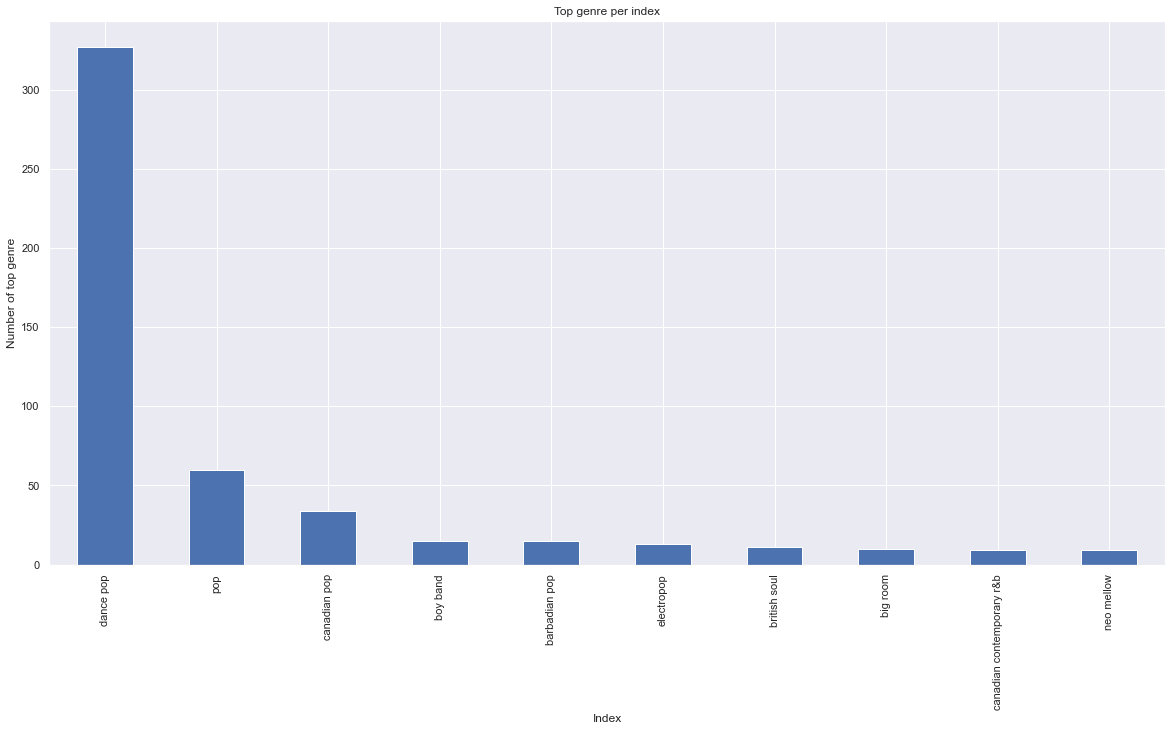

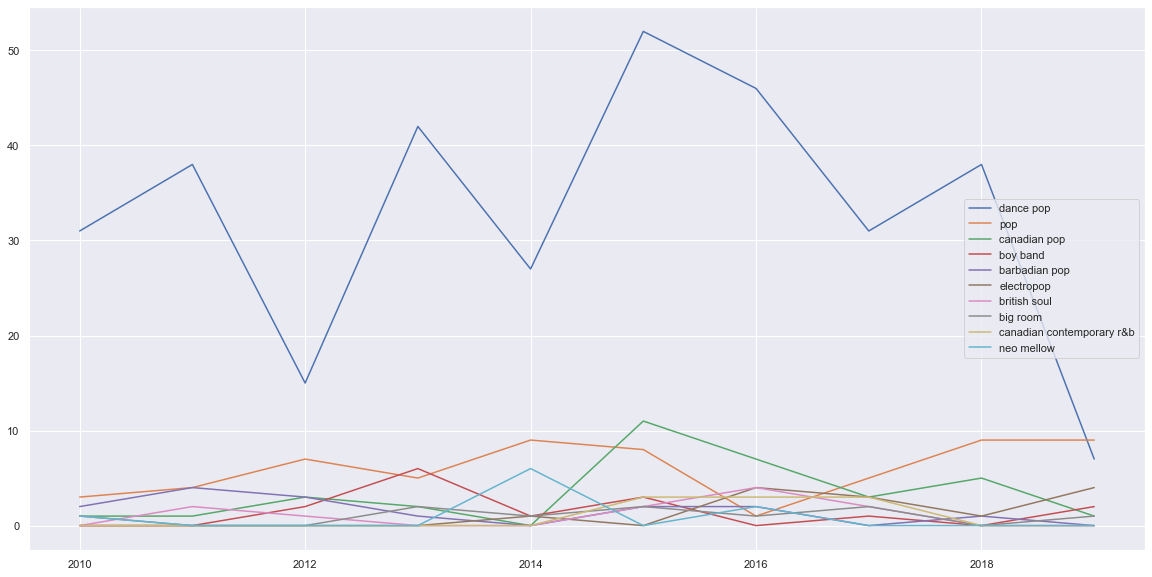

In [326]:

decade_df['top genre'].value_counts().reset_index().head(10)
decade_df['top genre'].value_counts().head(10).plot.bar(figsize=(20,10))
plt.xlabel('Index')
plt.ylabel('Number of top genre')
plt.title('Top genre per index')
decade_df['year'].unique()
#famous_genres= decade_df['top genre'].value_counts().reset_index().head(10)
##famous_genres.columns = ['genre', 'Count']
#famous_genres_list = list(famous_genres['genre'])
plt.figure(figsize=(20,10))
genres=decade_df['top genre'].value_counts().reset_index().head(10)
for i in genres['index']:
    tmp = []
    for y in range(2010,2020):
        songs= decade_df[decade_df['year'] ==y] [decade_df['top genre'] ==i]
        tmp.append(songs.shape[0])
    sns.lineplot(x=list(range(2010,2020)),y=tmp)
plt.legend(list(genres['index']))
plt.savefig("Output Data/genre_by_year.png")


SyntaxError: invalid syntax (<ipython-input-179-b75ea3aba897>, line 1)